---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [1]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [2]:
# Adding a new column to a dataframe usually involves specifying one scalar value, or in the case of having
# different values for each row, a series with value for **every** row. Pandas takes care of the unpacking and
# assignment of values to corresponding rows
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


In [3]:
df['Delivered'] = True
df

,Name,Item Purchased,Cost,Date,Delivered
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevyn,Kitty Litter,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-May,True


In [4]:
# However, this means that even missing values need to be declared explicitly
df['Feedback'] = ['Positive', None, 'Negative']
df

,Name,Item Purchased,Cost,Date,Delivered,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-May,True,Negative


In [5]:
# Or requires explicit mapping from index to value. Indices without a corresponding value will be assinged None.
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


### Terminologies
* Full outer join (union): All entities included
* Inner join (intersection): Only entities that are member of all groups

In [6]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [7]:
# Outer join, using indices from both the left and right data frames as joining columns
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [8]:
# Inner join
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [9]:
# Left join, get all entities from left data frame regardless of whether they have valuse for the right joining column
# Set addition
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [10]:
# Right join, also set addition
# Include all entities from right data frame
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [11]:
# Using column (instead of indices) for joining (left_index -> left_on, right_index -> right_on)
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [12]:
# Handling conflicting values between data frames
# Here the two data frames have confliciting location values for people who are both student and staff 
# merge() preserves both values, but add suffixes for disambiguation.
# _x indicates the left data frame, _y the right data frame
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [13]:
# Can join on multiple columns
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Idiomatic Pandas: Making Code Pandorable

In [14]:
import pandas as pd
df = pd.read_csv('census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


### Method Chaining
* Make multiple method calls on a data frame, one after another
* General ideal behind method chaining is that every method on an object returns a reference to that object, allowing one to condense many different operations on a data frame
* However, *chain indexing* (`df['this']['that']`) is generally considered as bad practice, since pandas might be returning a copy or a view of the data frame, depending on the underlying NumPy library
    * **Rule of thumb**: Think twice about method chaining if you see two **back-to-back square brackets**

In [15]:
# "Pandorable" style with method chaining
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [16]:
# Traditional method, less pandorable
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [17]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [18]:
df.apply(min_max, axis=1)

min       max
STNAME  CTYNAME                              
Alabama Autauga County      54660.0   55347.0
        Baldwin County     183193.0  203709.0
        Barbour County      26489.0   27341.0
        Bibb County         22512.0   22861.0
        Blount County       57373.0   57776.0
...                             ...       ...
Wyoming Sweetwater County   43593.0   45162.0
        Teton County        21297.0   23125.0
        Uinta County        20822.0   21102.0
        Washakie County      8316.0    8545.0
        Weston County        7065.0    7234.0

[3142 rows x 2 columns]

In [19]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County           54571.0            54571.0          54660.0   
        Baldwin County          182265.0           182265.0         183193.0   
        Barbour County           27457.0            27457.0          27341.0   
        Bibb County              22915.0            22919.0          22861.0   
        Blount County            57322.0            57322.0          57373.0   
...                                  ...                ...              ...   
Wyoming Sweetwater County        43806.0            43806.0          43593.0   
        Teton County             21294.0            21294.0          21297.0   
        Uinta County             21118.0            21118.0          21102.0   
        Washakie County           8533.0             8533.0           8545.0   
        Weston County             7208.0             7208.0           7181.0   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County             55253.0          55175.0  ...   
        Baldwin County            186659.0         190396.0  ...   
        Barbour County             27226.0          27159.0  ...   
        Bibb County                22733.0          22642.0  ...   
        Blount County              57711.0          57776.0  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County          44041.0          45104.0  ...   
        Teton County               21482.0          21697.0  ...   
        Uinta County               20912.0          20989.0  ...   
        Washakie County             8469.0           8443.0  ...   
        Weston County               7114.0           7065.0  ...   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
        Bibb County               -6.201001         -0.177537   
        Blount County             -1.748766         -2.062535   
...                                     ...               ...   
Wyoming Sweetwater County         -5.339774        -14.252889   
        Teton County              19.525929         14.143021   
        Uinta County              -6.902954        -14.215862   
        Washakie County           -2.013502        -17.781491   
        Weston County             12.372583          1.533635   

                           RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  \
STNAME  CTYNAME                                                         
Alabama Autauga County            -2.530799     7.606016    -2.626146   
        Baldwin County            17.197872    15.844176    18.559627   
        Barbour County           -10.543299    -4.87

In [20]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME   CTYNAME          
Alabama  Autauga County        55347.0
         Baldwin County       203709.0
         Barbour County        27341.0
         Bibb County           22861.0
         Blount County         57776.0
                                ...   
Wyoming  Sweetwater County     45162.0
         Teton County          23125.0
         Uinta County          21102.0
         Washakie County        8545.0
         Weston County          7234.0
Length: 3142, dtype: float64

# Group by

In [21]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [23]:
%%timeit -n 10
# Much slower and less pandorable than groupby
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average popu

Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have

Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Ve

Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an aver

Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average populatio

Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population 

Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have 

Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisco

Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an aver

Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average populatio

Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average popu

Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have

Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in st

Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizon

Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average populat

Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population o

Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have

Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virg

Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an 

Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average populatio

Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average po

Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have 

Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state W

Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an 

Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average populatio

Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average po

Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an avera

Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Ve

Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an 

Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average populatio

Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 3

In [24]:
%%timeit -n 10
# groupby() takes some column name(s) and *splits* the data frame up into chunks based on those names. It returns
# a data frame group by object, which can be iterated upon. The iteration returns a *tuple*, where the first item
# is the group condition, and the second item is the data frame reduced by that grouping.
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average populati

Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma hav

Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have 

Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyomi

Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolin

Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of

Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average popu

In [25]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [26]:
df = df.set_index('STNAME')

# This technique, which is sorth of a light weight hashing, is commonly used to distribute tasks across multiple workers.
def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [37]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [38]:
# Common workflow with groupby: Split-Apply-Combine
# Split data using groupby, apply some function, combine the results

# agg() short for aggregate,applies a function to the column(s) of data in the group and returns the result
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [39]:
# Original: print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011'])), raises following warning in Python3.7
# "Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead."
# Data frame groupby
print(type(df.groupby(level=0)[['POPESTIMATE2010','POPESTIMATE2011']]))
# Series groupby
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [40]:
# Original: (df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average, 'sum': np.sum}))
# raises SpecificationError: nested renamer is not supported in new pandas version
# https://pandas.pydata.org/pandas-docs/stable/whatsnew/v0.20.0.html#whatsnew-0200-api-breaking-deprecate-group-agg-dict

(df.set_index('STNAME')
 .groupby(level=0)['CENSUS2010POP']
 .agg([np.average, np.sum]))
 .rename(columns={'average':'avg', 'sum':'sum'})

,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


In [42]:
# Original
#(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
#    .agg({'avg': np.average, 'sum': np.sum}))

# Similar to cell above, rewritten to avoid multi-index warning and SpecificationError
# When applying aggregate() on data frame groupby, pandas builds a hierarchical column space and applies all
# functions to each of the groups
(df.set_index('STNAME')
 .groupby(level=0)[['POPESTIMATE2010','POPESTIMATE2011']]
 .agg([np.average, np.sum])
 .rename(columns={'average':'avg', 'sum':'sum'})
)

POPESTIMATE2010           POPESTIMATE2011          
                                 avg       sum             avg       sum
STNAME                                                                  
Alabama                 71420.313433   4785161    71658.328358   4801108
Alaska                  24621.413793    714021    24921.379310    722720
Arizona                427213.866667   6408208   431248.800000   6468732
Arkansas                38965.253333   2922394    39180.506667   2938538
California             643691.017241  37334079   650000.586207  37700034
Colorado                78878.968750   5048254    79991.875000   5119480
Connecticut            447464.625000   3579717   448719.875000   3589759
Delaware               299930.333333    899791   302638.666667    907916
District of Columbia   605126.000000    605126   620472.000000    620472
Florida                281341.641791  18849890   285157.208955  19105533
Georgia                 61090.905660   9713454    61712.452830   9812280
Hawaii                 272796.000000   1363980   275645.400000   1378227
Idaho                   35704.227273   1570986    36003.045455   1584134
Illinois               125894.598039  12841249   126096.882353  12861882
Indiana                 70549.891304   6490590    70835.271739   6516845
Iowa                    30815.090909   3050694    30963.525253   3065389
Kansas                  27226.895238   2858824    27332.542857   2869917
Kentucky                36232.808333   4347937    36399.016667   4367882
Louisiana               71014.859375   4544951    71490.328125   4575381
Maine                   82980.937500   1327695    83016.062500   1328257
Maryland               241183.708333   5788409   243507.125000   5844171
Massachusetts          468931.142857   6565036   472271.214286   6611797
Michigan               119004.445783   9877369   118995.048193   9876589
Minnesota               61044.862069   5310903    61472.632184   5348119
Mississippi             36223.365854   2970316    36317.060976   2977999
Missouri                52139.582609   5996052    52265.973913   6010587
Montana                 17690.053571    990643    17816.892857    997746
Nebraska                19677.688172   1830025    19810.569892   1842383
Nevada                 159025.882353   2703440   159930.529412   2718819
New Hampshire          131670.800000   1316708   131834.400000   1318344
New Jersey             419232.428571   8803881   421092.095238   8842934
New Mexico              62567.909091   2064741    62976.545455   2078226
New York               312950.322581  19402920   314890.354839  19523202
North Carolina          95589.790000   9558979    96510.250000   9651025
North Dakota            12726.981132    674530    12930.679245    685326
Ohio                   131145.068182  11540766   131198.204545  11545442
Oklahoma                48825.922078   3759596    49176.961039   3786626
Oregon                 106610.333333   3837972   107458.583333   3868509
Pennsylvania           189731.552239  12712014   190226.895522  12745202
Rhode Island           210643.800000   1053219   210371.200000   1051856
South Carolina         100780.304348   4635894   101581.152174   4672733
South Dakota            12368.166667    816299    12489.227273    824289
Tennessee               66911.421053   6356585    67351.663158   6398408
Texas                   99387.255906  25244363   101001.826772  25654464
Utah                    95704.344828   2775426    97118.620690   2816440
Vermont                 44713.142857    625984    44763.357143    626687
Virginia                60344.263158   8025787    60983.330827   8110783
Washington             172898.974359   6743060   174954.589744   6823229
West Virginia           33713.181818   1854225    33726.327273   1854948
Wisconsin               79030.611111   5690204    79301.666667   5709720
Wyoming                 24544.173913    564516    24685.565217    567768

In [43]:
# Unlike the cell above, this one WILL RUN!
# However, notice here we instruct aggregate() to apply function on specific columns in the data frame group by,
# and the result is *no longer hierarchical*, instead just the result of applying function on corresponding colunmn.
# Here we have only *average* population for 2010, and only *total* population for 2011, instead of having 
# both average and sum for both years

(df.set_index('STNAME')
 .groupby(level=0)[['POPESTIMATE2010','POPESTIMATE2011']]
 .agg({'POPESTIMATE2010':np.average, 'POPESTIMATE2011':np.sum})
)


,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


# Scales

### Ratio Scale
* Units are equally spaced
* Mathematical operations of +-*/ are all valid
* e.g. height and weight

### Interval Scale
* Units are equally spaced, but there is **no true zero**
* e.g. temperatures measured in C or F, where 0 degrees is a meaningful value (rather than indication for lack of value)
* For most of data mining, the differences between the ratio and interval scales might not be clearly apparent or important than to algorithm used. But it's important to keep the difference in mind when applying advanced statistical tests. 

### Ordinal Scale
* Order of the units is important, but **not evenly spaced**
* e.g. letter grades
* Verfy common in ML and can sometimes be a challenge to work with

### Nominal Scale (a.k.a. Categorical Data)
* Categories of data, but the categories ahve no order with respect to one another
* Categories where there are only two possible values are also called *binary*
* e.g. sports teams

In [44]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [45]:
# Setting type of 'Grades' column to categorical
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [47]:
# Further converting 'Grades' to ordinal data
#
# Original, raises TypeError: astype() got an unexpected keyword argument 'categories' in newer versions of pandas
# grades = df['Grades'].astype('category',
#                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
#                             ordered=True)

# https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categoricaldtype
from pandas.api.types import CategoricalDtype
# ordered flag is set to indicate the specific orderings among categories. Otherwise lexographical order will be
# used by default, which would make both A+ and A- higher grades than A and so on. 
grades = df['Grades'].astype(
    CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                     ordered=True))
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [48]:
# With ordered=True, broadcasting now works as expected. And certain set of mathematical operators such as  min/max
# can also be used on the ordinal data
#
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

Sometimes it's useful to represent categorical values as each being a column with a true or a false as to whether that category applies. This is especially common in feature extraction.

Variables with a Boolean value are typically called **dummy variables**. And pandas has a built-in function called `get_dummies`, which will convert the values of a single column into multiple columns of 0's and 1's, indicating the presence of a dummy variable.

In [53]:
s = pd.Series(list('abca'))
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [54]:
# Reducing a value on the *interval or ratio scale* （e.g. a number grade）, into one 
# that is categorical (e.g. letter grade). Useful when visualizing the frequencies of categories (histograms),
# or when using a ML classification approach on the data (requires reducing dimensionality)
#
# cut() takes an array-like structure (series or data frame), and a number of bins to be used 
# (all bins are kept at equal spacing), and turns the array into categories

df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
# Similar to cells above, need to rewrite aggregate to get rid of SpecificationError
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg(avg=np.average)
# Can also specifiy labels for each bin via `labels` kwarg
pd.cut(df['avg'],10)

STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

# Pivot Tables
A pivot table is a way of summarizing data in a data frame for a particular purpose. It makes heavy use of the aggregation function. A pivot table is itself a data frame, where the rows represent one variable that you're interested in, the columns another, and the cell's some aggregate value. A pivot table also tends to includes *marginal values* as well, which are the *sums for each column and row*, allowing one to see the relationship between two variables at just a glance. 

In [55]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [56]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [57]:
# Compare makes of electric vehicles versus the year. The comparison to be done on battery capacity.
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [58]:
# Possible to pass multiple aggregation functions
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# Date Functionality in Pandas

In [59]:
import pandas as pd
import numpy as np

### Timestamp

In [60]:
# Timestamp represents a single timestamp and associates values with points in time.
# Interchangeable with Python's datetime in most cases
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [61]:
# Period represents a single time span, such as a specific day or month.
pd.Period('1/2016')

Period('2016-01', 'M')

In [62]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [63]:
# DatetimeIndex is the index of a timestamp
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [64]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [65]:
# Similary, PeriodIndex is the index of a period
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [66]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [67]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,18,32
"Aug 29, 2014",81,94
2015-06-26,77,94
7/12/16,25,20


In [68]:
# to_datetime() tries to parse date strings into datetime and put them into a standard format
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,18,32
2014-08-29,81,94
2015-06-26,77,94
2016-07-12,25,20


In [69]:
# Parsing dates in different format (e.g. day first or month first)
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [70]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [71]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [72]:
# 9 dates, taken bi-weekly on everySunday, starting in Oct 2016
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [73]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,108,125
2016-10-16,117,126
2016-10-30,112,129
2016-11-13,118,123
2016-11-27,114,120
2016-12-11,121,115
2016-12-25,124,121
2017-01-08,130,119
2017-01-22,137,128


In [83]:
# weekday_name() removed in pandas 1.0.0
# AttributeError: 'DatetimeIndex' object has no attribute 'weekday_name'
# df.index.weekday_name
df.index.day_name().array

<PandasArray>
['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
 'Sunday', 'Sunday']
Length: 9, dtype: object

In [84]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,9.0,1.0
2016-10-30,-5.0,3.0
2016-11-13,6.0,-6.0
2016-11-27,-4.0,-3.0
2016-12-11,7.0,-5.0
2016-12-25,3.0,6.0
2017-01-08,6.0,-2.0
2017-01-22,7.0,9.0


In [85]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,112.333333,126.666667
2016-11-30,116.000000,121.500000
2016-12-31,122.500000,118.000000
2017-01-31,133.500000,123.500000


In [86]:
df['2017']

,Count 1,Count 2
2017-01-08,130,119
2017-01-22,137,128


In [87]:
df['2016-12']

,Count 1,Count 2
2016-12-11,121,115
2016-12-25,124,121


In [88]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,121,115
2016-12-25,124,121
2017-01-08,130,119
2017-01-22,137,128


In [89]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,108,125
2016-10-09,108,125
2016-10-16,117,126
2016-10-23,117,126
2016-10-30,112,129
2016-11-06,112,129
2016-11-13,118,123
2016-11-20,118,123
2016-11-27,114,120
2016-12-04,114,120


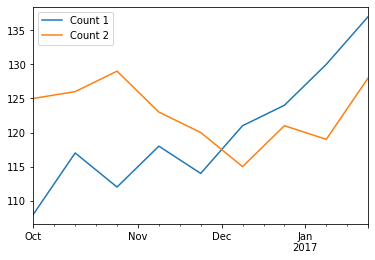

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()